In [4]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [5]:
## Read the data
data = pd.read_csv('data/StudentsPerformance.csv')

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.shape

(1000, 8)

In [8]:
## Missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
## Duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
## Data Types
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
## Checking unique values
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
## Check stats 
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
## Exploring the dataset
print("Gender:",data['gender'].unique())
print("Race/Ethnicity:",data['race/ethnicity'].unique())
print("Parental Level of Education:",data['parental level of education'].unique())
print("Lunch:",data['lunch'].unique())
print("Test Preparation Course:",data['test preparation course'].unique())

Gender: ['female' 'male']
Race/Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Parental Level of Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch: ['standard' 'free/reduced']
Test Preparation Course: ['none' 'completed']


In [16]:
## Dividing into categorical and numerical varibles
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

print("Categorical columns:",cat_cols)
print("Numerical columns:",num_cols)

Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical columns: ['math score', 'reading score', 'writing score']


In [18]:
## Adding total score and average score column
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average score'] = data['total score']/3

In [20]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average score', ylabel='Count'>

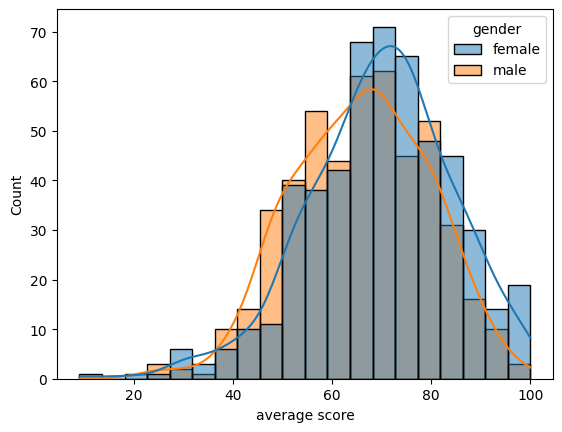

In [21]:
## Visualizing the data
sns.histplot(data=data, x='average score', bins=20, kde=True, hue='gender')

<Axes: xlabel='average score', ylabel='Count'>

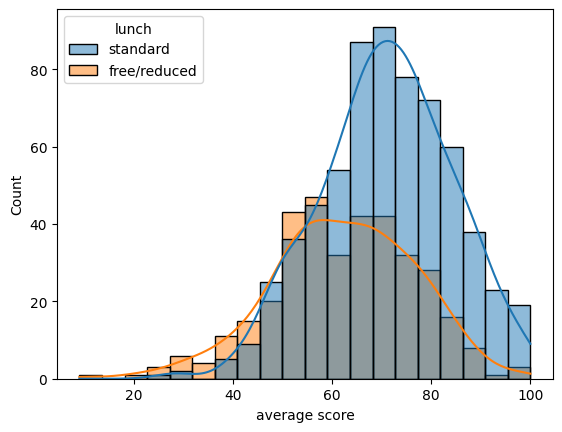

In [22]:
sns.histplot(data=data, x='average score', bins=20, kde=True, hue='lunch')

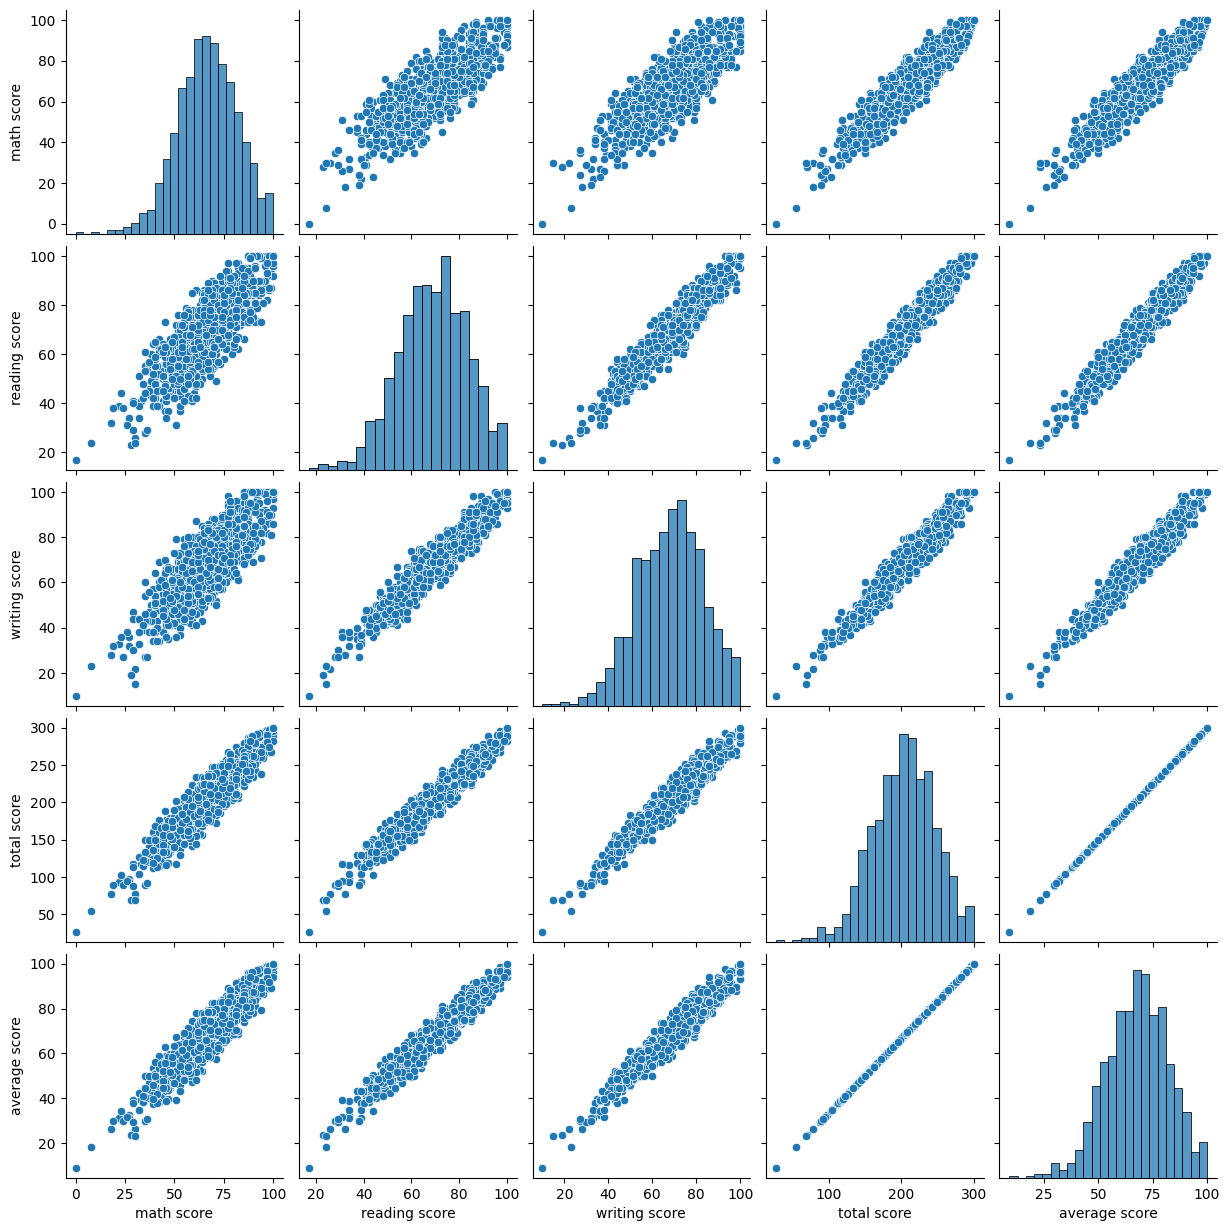

In [28]:
sns.pairplot(data)

<Axes: xlabel='gender', ylabel='average score'>

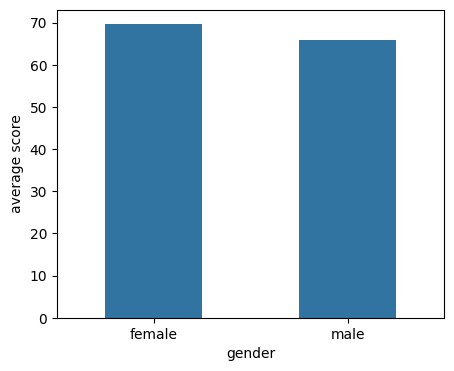

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(data.groupby('gender')['average score'].mean(),width=0.5)